In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# The first row of measurement table
first = session.query(measurement).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19f7f5e87c0>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

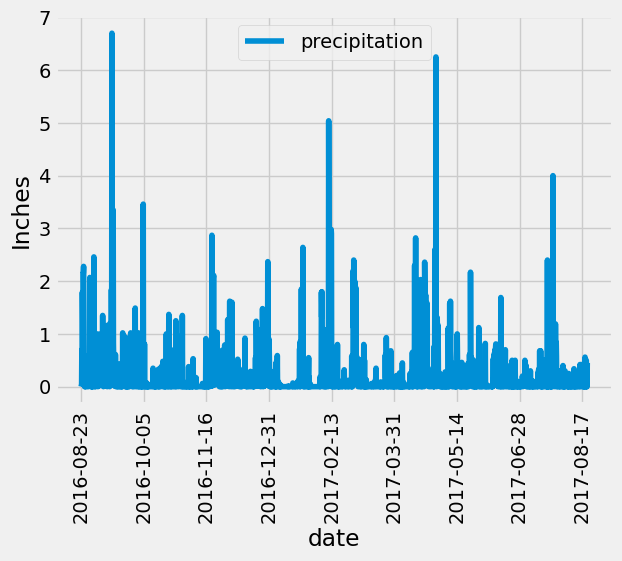

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# last_12months = session.query(measurement.date).filter(measurement.date)
# Calculate the date one year from the last date in data set.
# recent_date_new = recent_date.date
# one_year = dt.datetime.strptime(recent_date_new, '%Y-%m-%d') - dt.timedelta(days=365)
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

# Perform a query to retrieve the data and precipitation scores

x = session.query(measurement.prcp, measurement.date).filter(measurement.date >= one_year).all()
x
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(x, columns=['precipitation', 'date'])
df.set_index("date", inplace = True)
df = df.dropna()
# Sort the dataframe by date

df_sort = df.sort_values('date')
df_sort
# Use Pandas Plotting with Matplotlib to plot the data
df_sort.plot(rot=90)
plt.ylabel("Inches")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sort.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

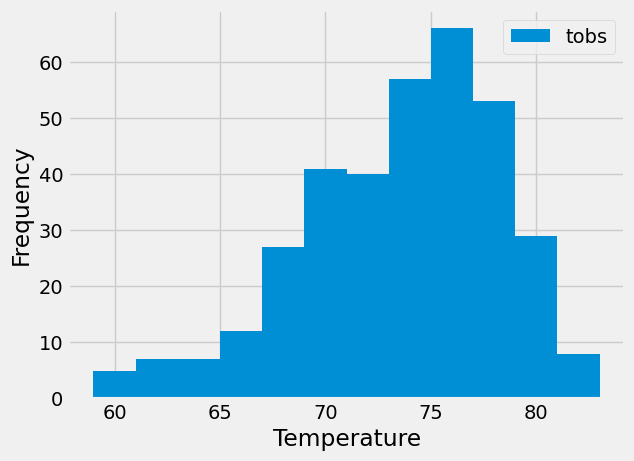

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
y = session.query(measurement.tobs, measurement.date).filter(measurement.station == 'USC00519281')\
.filter(measurement.date >= one_year).all()
y

df1 = pd.DataFrame(y, columns=['tobs', 'date'])
df1.set_index("date", inplace = True)
df1 = df1.dropna()
df1.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [17]:
# Close Session
session.close()